In [5]:
#imports

import numpy as np 
import matplotlib.pyplot as plt 

In [6]:
#assigning true weight and bias
true_w = 3
true_b = 2

#assigning 100 random values to a feature
n_samples = 100
X = np.linspace (-5,5,n_samples)
noise = np.random.uniform(0,2,100)

#making a model
y = true_w*X + true_b + noise

print ("X shape: ", X.shape)
print ("y shape: ", y.shape)

X shape:  (100,)
y shape:  (100,)


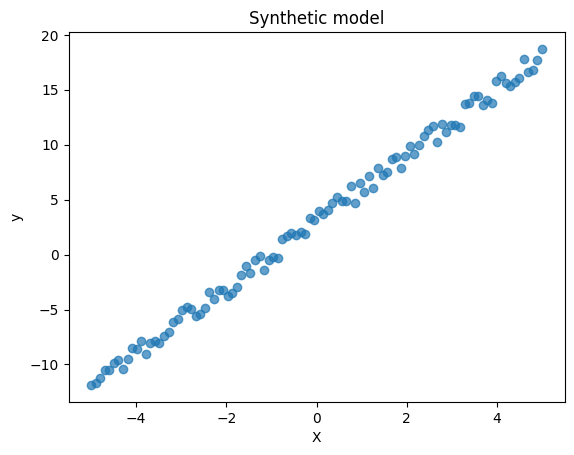

In [7]:
#Visualization
plt.scatter(X,y, alpha = 0.7)
plt.xlabel("X")
plt.ylabel("y")
plt.title ("Synthetic model")
plt.show()

In [10]:
def predict(X, w, b):
    """
    X: array of shape (n_samples,)
    w: scalar weight
    b: scalar bias
    returns: predictions of shape (n_samples,)
    """
    # TODO: implement y_hat = w * X + b
    y_hat = w * X + b
    return y_hat


def mse_loss(y_true, y_pred):
    """
    Mean Squared Error.
    """
    # TODO: implement MSE: average of (y_true - y_pred)^2
    errors = y_true - y_pred
    loss = np.mean(errors ** 2)
    return loss

y_pred = predict(X, true_w, true_b)
print("Current prediction: ", y_pred.shape)

MSE = mse_loss(y, y_pred)
print("MSE: ", MSE)

Current prediction:  (100,)
MSE:  1.5675243842576927


In [16]:
def compute_gradients(X,y,w,b):
    '''This is supposed to compute gradient.'''

    n = len(X)
    errors = predict(X, w, b) - y

    weight_grad = (2/n)*np.sum(errors*X)
    bias_grad = (2/n)*np.sum(errors)

    return weight_grad, bias_grad


In [23]:
def training(learning_rate, epochs):
    '''Training Cell'''
    training_w = 0
    training_b = 0

    loss_history = []

    for i in range(epochs):
        y_pred = predict(X, training_w, training_b)
        loss = mse_loss(y, y_pred)

        loss_history.append(loss)

        new_w, new_b = compute_gradients(X, y, training_w, training_b)

        training_w = training_w - (learning_rate*new_w)
        training_b = training_b - (learning_rate*new_b)


    
    print("Learned Weight: ", training_w)
    print("Learned Bias: ", training_b)
    print(len(loss_history))

    return loss_history, training_w, training_b


training(0.01,200)



Learned Weight:  2.998631536455539
Learned Bias:  3.056110112534738
200


([np.float64(86.45616284847046),
  np.float64(62.28652019472045),
  np.float64(45.53333915333837),
  np.float64(33.89306497974644),
  np.float64(25.778744367960144),
  np.float64(20.097057153735037),
  np.float64(16.09472566090401),
  np.float64(13.252714438647802),
  np.float64(11.213350137753604),
  np.float64(9.730118240026432),
  np.float64(8.633080613379644),
  np.float64(7.8050533892921194),
  np.float64(7.165197033217464),
  np.float64(6.6577122683944445),
  np.float64(6.244053144331053),
  np.float64(5.897562877012015),
  np.float64(5.599778608179706),
  np.float64(5.3378857964524755),
  np.float64(5.102964532059167),
  np.float64(4.888781369731708),
  np.float64(4.690956944560291),
  np.float64(4.5063924494845145),
  np.float64(4.332874433625342),
  np.float64(4.168802441186812),
  np.float64(4.013001273459329),
  np.float64(3.864591547844867),
  np.float64(3.7229004191452035),
  np.float64(3.5873999709052264),
  np.float64(3.4576646714484554),
  np.float64(3.333341966679688),

Learned Weight:  2.998631536455539
Learned Bias:  3.056110112534738
200


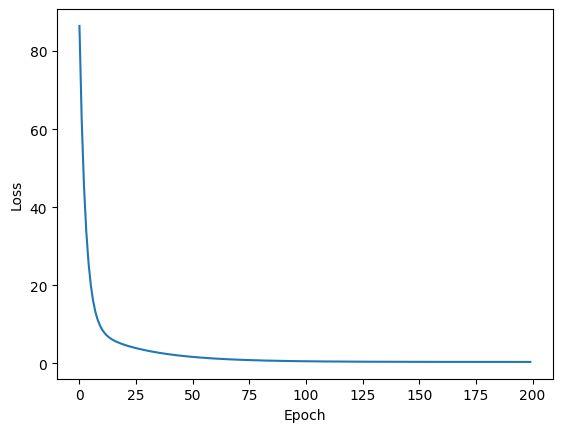

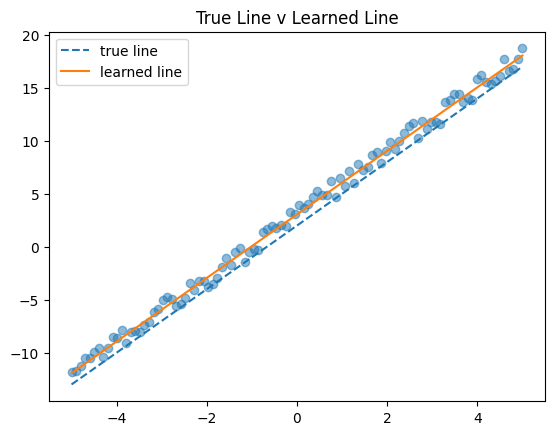

In [31]:
loss_history, training_w, training_b = training(0.01,200)
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

#Line of best fit
y_line = predict(X, training_w, training_b)
plt.scatter(X,y, alpha = 0.5)
line_X = np.array([-5,5])
line_y_true = true_w*line_X + true_b
line_y_learned = training_w*line_X + training_b
plt.plot(line_X, line_y_true,linestyle = "--", label = "true line")
plt.plot (line_X, line_y_learned, label = "learned line")
plt.legend()
plt.title ("True Line v Learned Line")
plt.show()

